In [1]:
import cv2
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

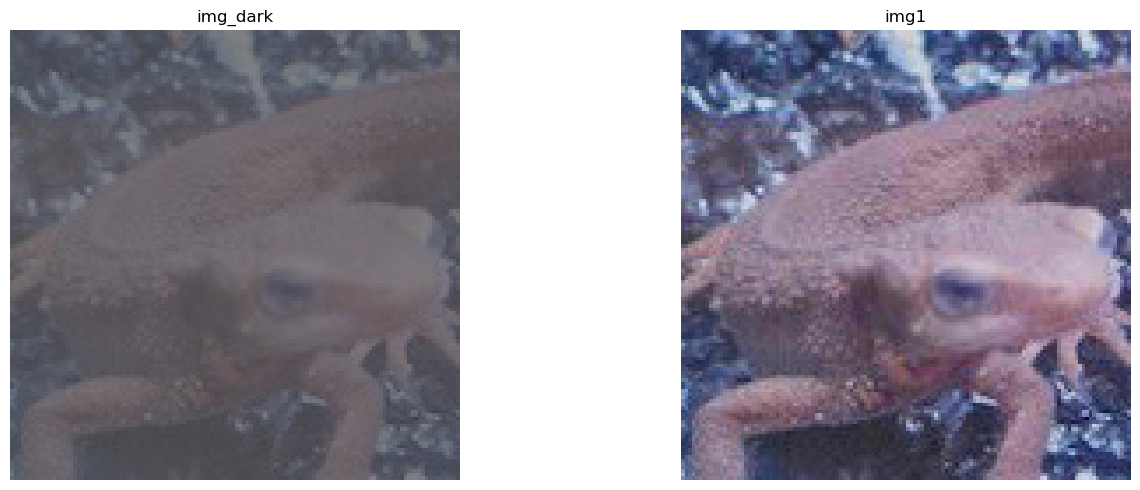

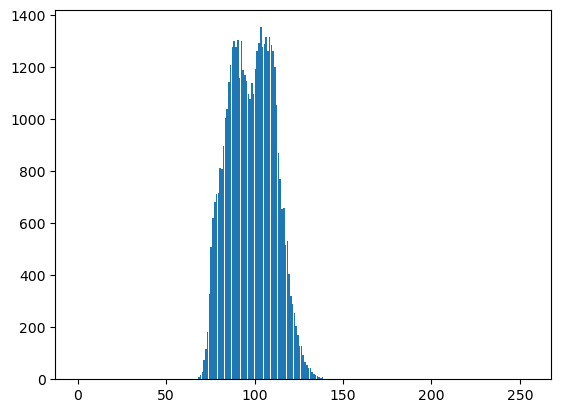

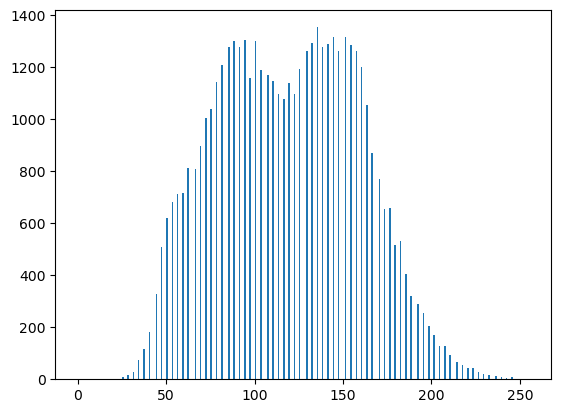

In [2]:
# 直方图归一化,灰度转换通过动态映射将灰度图转化为彩色图。
def normalHist(img):
    a = 0
    b = 255
    c = img.min()
    d = img.max()
    img = (b-a)/(d-c)*(img-c) + a
    img = img.astype(np.uint8)
    return img

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img1 = img_dark.copy()
img1 = normalHist(img1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img_dark)
axes[0].set_title('img_dark')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img1)
axes[1].set_title('img1')
axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img_dark.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img1.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

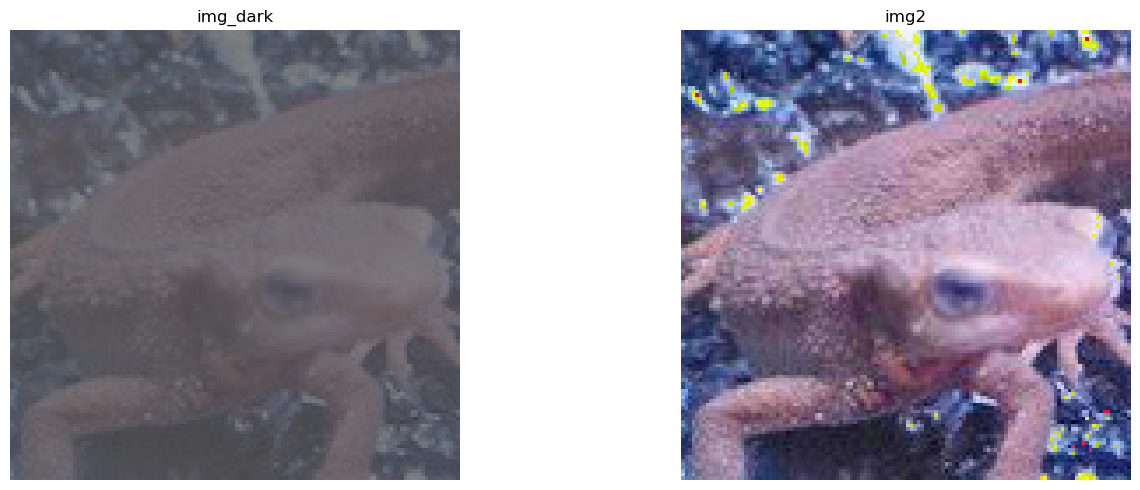

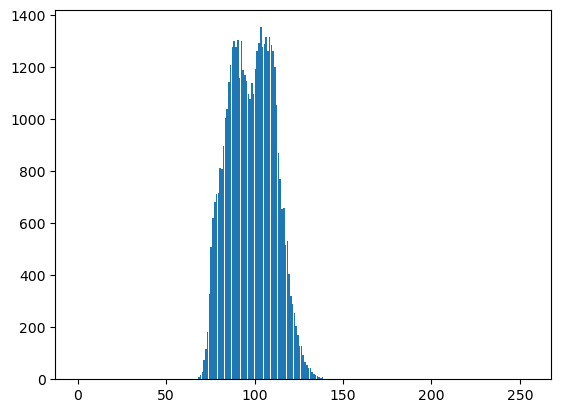

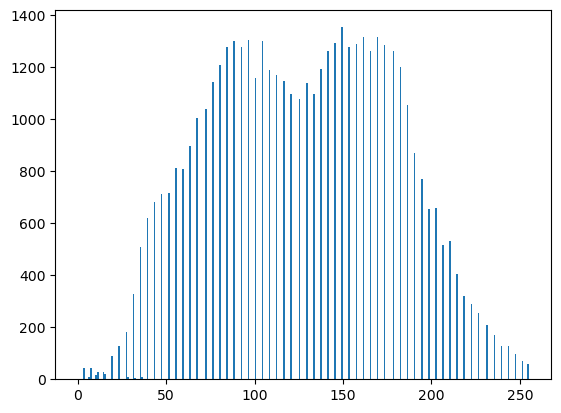

In [3]:
# 直方图平坦化

def evenHist(img,m0,s0):
    m = img.mean()
    s = np.sqrt(img.var())
    #通过缩放和平移图像像素值来调整其均值和标准差
    img = (s0/s)*(img-m)+m0
    img = img.astype(np.uint8)
    return img

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img2 = img_dark.copy()
img2 = evenHist(img2,128,52)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img_dark)
axes[0].set_title('img_dark')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img2)
axes[1].set_title('img2')
axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img_dark.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img2.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

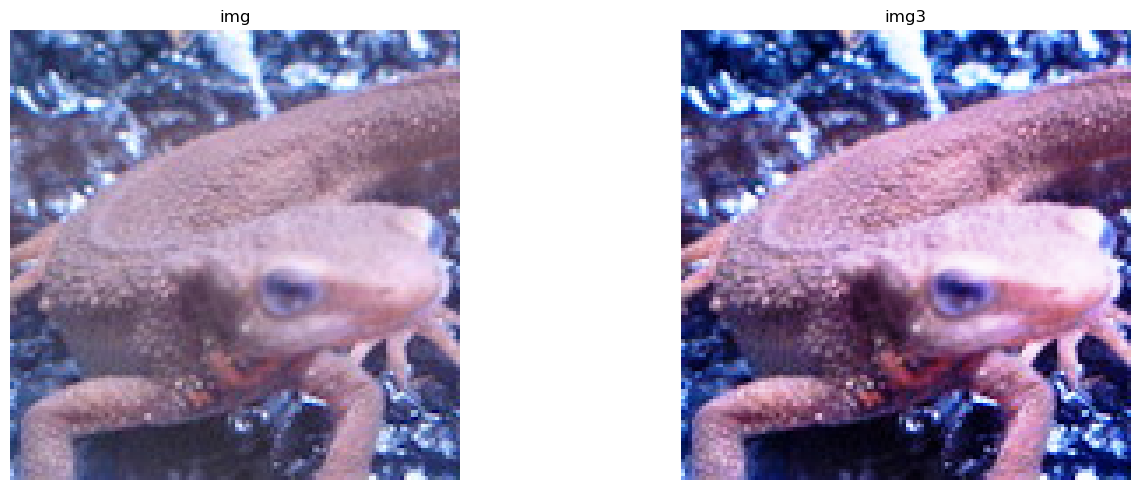

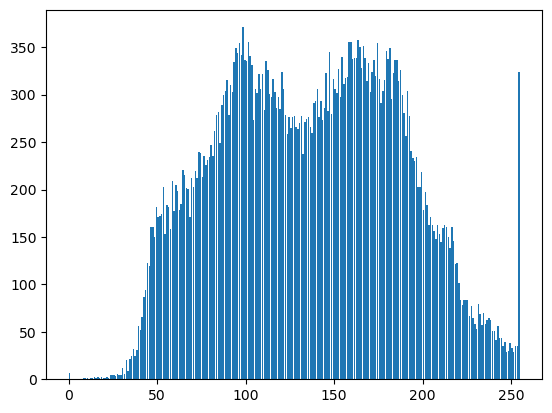

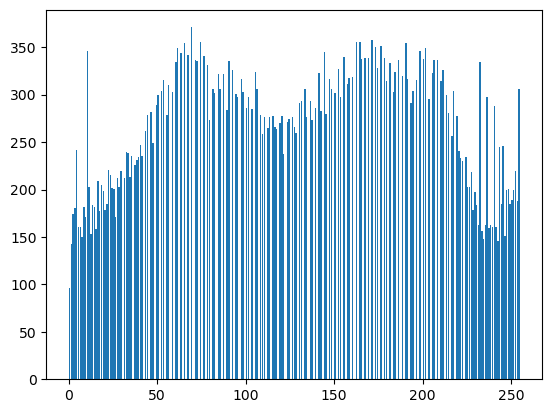

In [4]:
# 直方图均衡化

def equalHist(img):
    result = np.zeros_like(img)
    #像素总数
    imgsize = img.size
    #统计0~255的值的个数
    count = np.bincount(img.reshape(-1))
    
    for i in range(count.size):
        #如果这个像素值的个数不为0（就是存在该像素值的点）
        if count[i]:
            #计算累计个数
            sum = count[:i+1].sum()
            x = 255*(sum/imgsize)
            #四舍五入后转为uint8类型
            x = np.around(x).astype(np.uint8)
            #修改原本的像素值，改动放到新的图片上，以免打乱后面的像素值运算
            result[img == i] = x
    
    return result

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img3 = img.copy()
img3 = equalHist(img3)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img3)
axes[1].set_title('img3')
axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img3.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

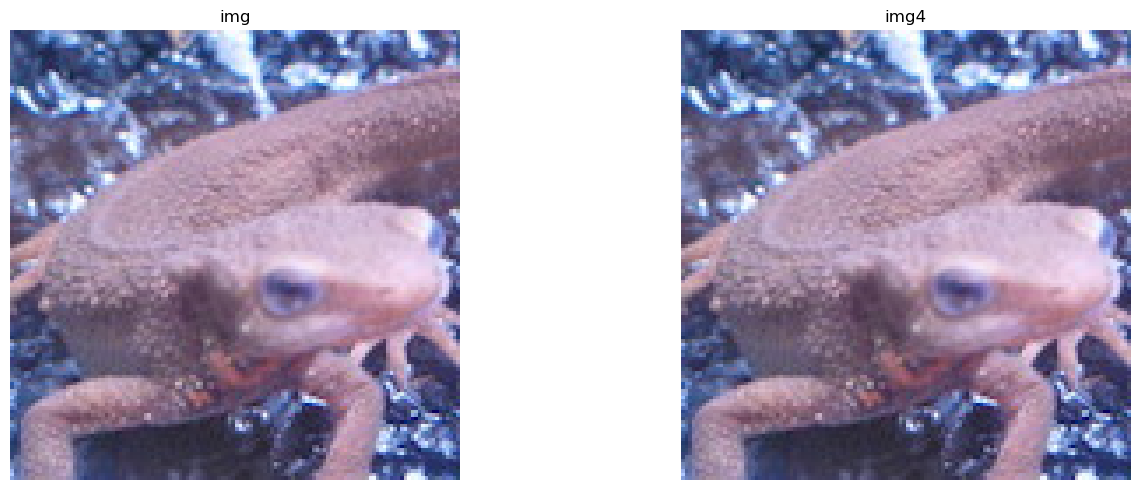

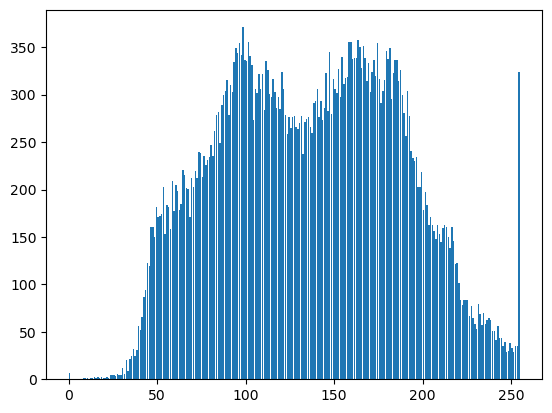

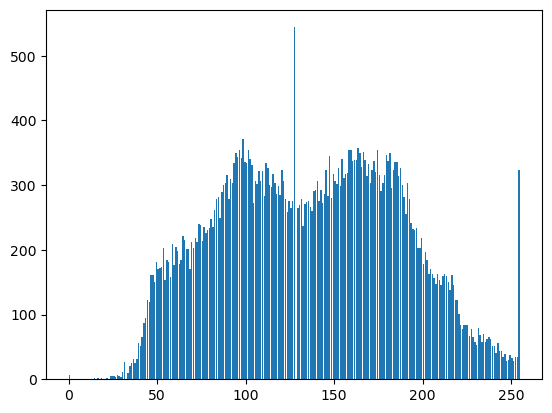

In [6]:
# 伽马矫正

def gammaCorrection(img,gamma,c = 1):
    img_normal = (img+0.01)/255
    img_gamma = (1/c)*np.power(img_normal,(1/gamma))
    img_out = img_gamma*255 - 0.01
    #防止溢出
    img_out = np.clip(img_out, 0, 255)
    result = img_out.astype(np.uint8)
    return result

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img4 = img.copy()
img4 = gammaCorrection(img4,1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img4)
axes[1].set_title('img4')
axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img4.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

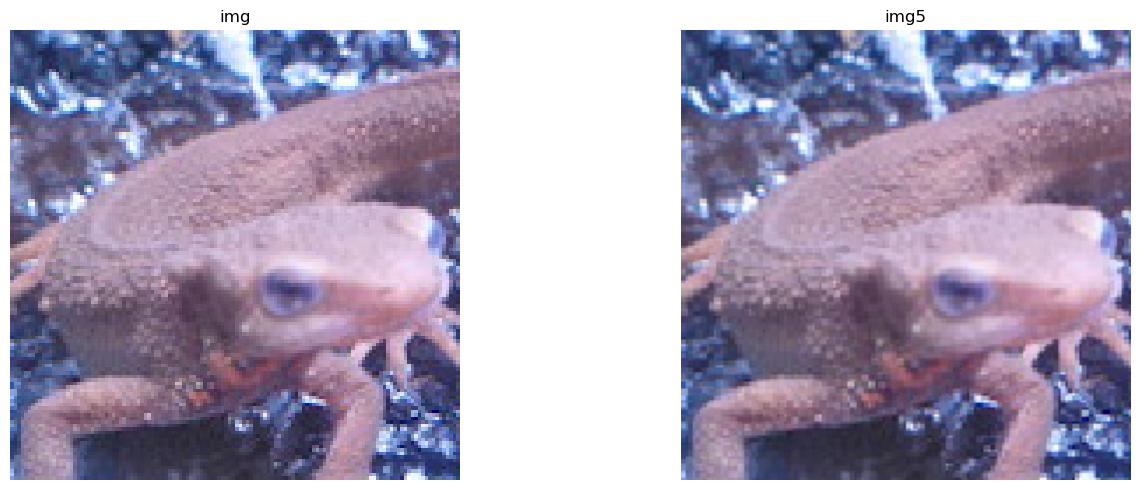

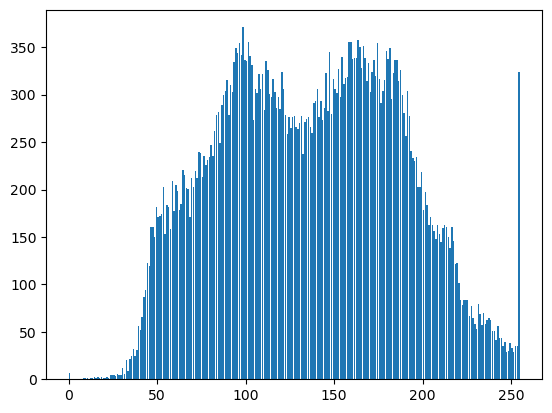

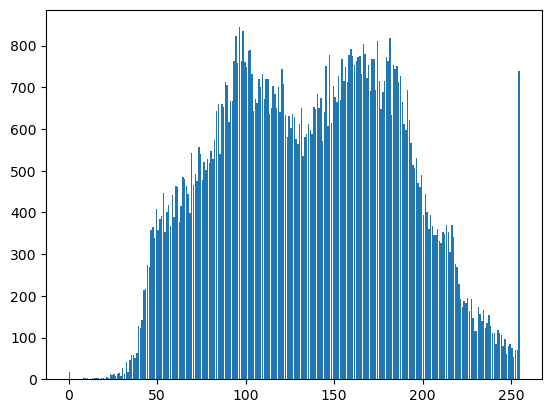

In [5]:
# 最邻近插值

def nnInterpolation(img, a):
    newshape = [int(img.shape[0]*a),int(img.shape[1]*a),img.shape[2]]
    result = np.zeros((newshape))
    for x in range(newshape[0]):
        for y in range(newshape[1]):
            x_a = int(np.floor(x/a))
            y_a = int(np.floor(y/a))
            result[x,y] = img[x_a,y_a]
    
    result = result.astype(np.uint8)
    return result

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img5 = img.copy()
img5 = nnInterpolation(img5, 1.5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('off')  # 隐藏坐标轴

axes[1].imshow(img5)
axes[1].set_title('img5')
axes[1].axis('off')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img5.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

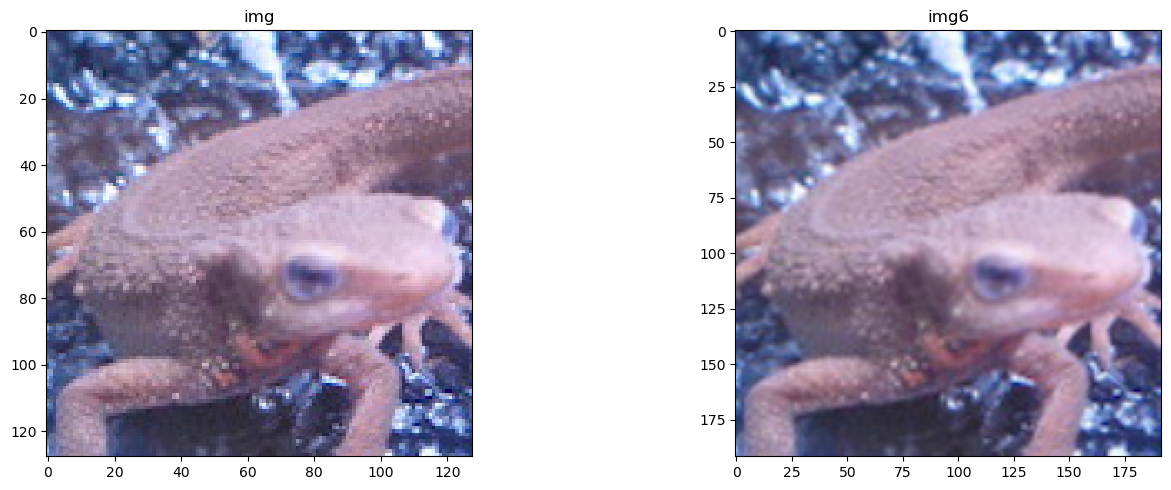

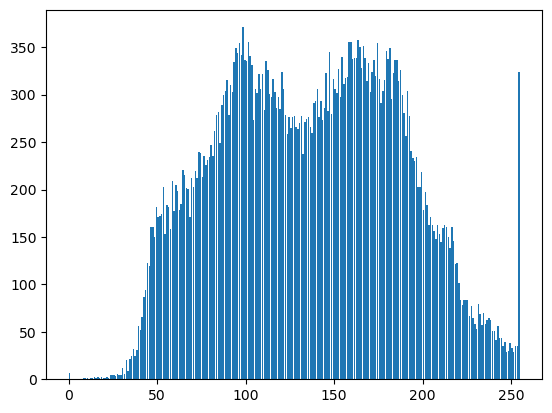

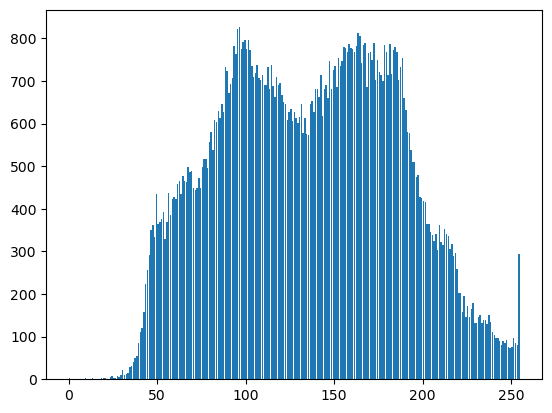

In [6]:
# 双线性插值

def bnInterprolation(img,a):
    newshape = [int(img.shape[0]*a),int(img.shape[1]*a),img.shape[2]]
    result = np.zeros((newshape))
    #遍历新的图像坐标
    for x in range(newshape[0]):
        for y in range(newshape[1]):
            #对应的原图像上的点(向下取整，也就是左上点的位置)
            x0 = int(np.floor(x/a))
            y0 = int(np.floor(y/a))
            #新图像的坐标/放缩比例 - 原图像坐标点 = 距离
            dx = x/a-x0
            dy = y/a-y0
            
            #防止溢出
            x1 = x0+1 if x0<img.shape[0]-1 else x0
            y1 = y0+1 if y0<img.shape[1]-1 else y0   
            result[x,y] = (1-dx)*(1-dy)*img[x0,y0]+dx*(1-dy)*img[x1,y0]\
                            +(1-dx)*dy*img[x0,y1]+dx*dy*img[x1,y1]
            
    result = result.astype(np.uint8)
    return result   

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img6 = img.copy()
img6 = bnInterprolation(img6,1.5)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('on')  # 隐藏坐标轴

axes[1].imshow(img6)
axes[1].set_title('img6')
axes[1].axis('on')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img6.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

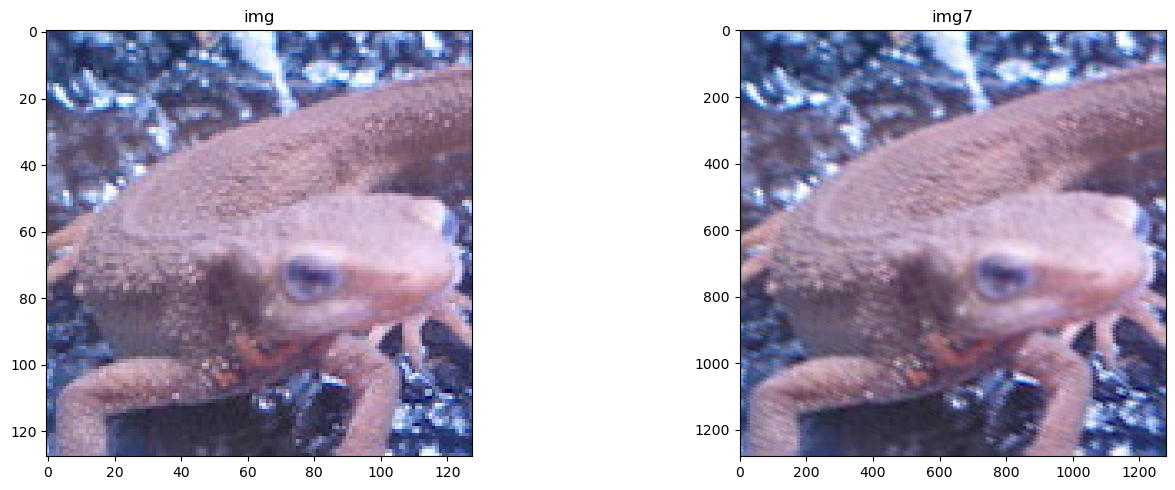

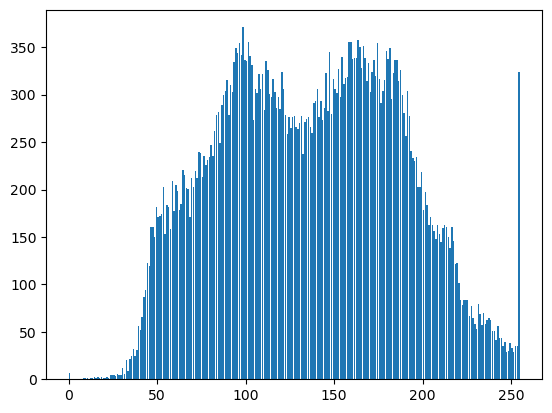

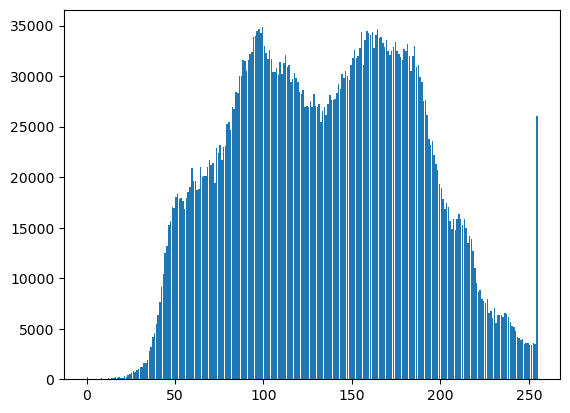

In [8]:
# 双三次插值

#权重计算公式
def weight(absd):
    weights = np.zeros_like(absd)
    a = -1
    #先计算距离为0~1的点的权重
    w = (a+2)*np.power(absd,3) - (a+3)*np.square(absd) + 1
    weights[absd <= 1] = w[absd <= 1]
    #再计算距离为1~2的点的权重
    w = a*np.power(absd,3) - 5*a*np.square(absd) + 8*a*absd -4*a
    weights[(absd > 1)*(absd <= 2)] = w[(absd > 1)*(absd <= 2)]
    #其余的都为0
    return weights


def bicInterpolation(img,a):
    max_x,max_y,_ = img.shape
    #将新图像的x的坐标点映射回原图像,所以每个点的坐标为（x[i,j],y[i,j]）
    list = np.arange(img.shape[0]*a)/a
    y = np.tile(list,list.shape[0]).reshape(list.shape[0],-1)
    x = y.T
    #映射点（图中红点）对应的左上角蓝点坐标
    x0 = np.floor(x)
    y0 = np.floor(y)

    #其他15个点的坐标
    xx = np.array([np.maximum(x0-1,0),x0,np.minimum(x0+1,max_x-1),np.minimum(x0+2,max_x-1)])

    yy = np.array([np.maximum(y0-1,0),y0,np.minimum(y0+1,max_y-1),np.minimum(y0+2,max_y-1)])
    # 前面的对应的映射点的坐标(带小数)
    #而后面对应的周围16点的坐标。相减取绝对值得到距离
    #用maximun限定坐标下限(0)，用minmun限定坐标上限(max)防止溢出
    dx = np.abs(x-xx)
    dy = np.abs(y-yy)

    wx = weight(dx)
    wy = weight(dy)

    #初始化联合权重和输出(3,192,192)
    #联合权重  = 将距离代入权重函数后横纵权重相乘再累加，公式见题
    h_sum = np.zeros((img.shape[2],int(img.shape[0]*a),int(img.shape[1]*a)))
    i_sum = np.zeros_like(h_sum)
    for i in range(4):
        for j in range(4):
            #像素值
            x = img[xx[i].astype(np.uint8),yy[i].astype(np.uint8)]
            #旋转一下维度，让通道变为第一维，方便矩阵相乘
            x = x.transpose(2,0,1)
            #联合权重，扩充成3维，方便计算
            w_xy = wx[i]*wy[j]
            wxy = np.array([w_xy,w_xy,w_xy])
            h_sum += w_xy
            
            #联合权重在乘上对应的像素值
            i_sum += (x*w_xy)
    
    #相除得到结果，再把通道放回第三维
    result = (i_sum/h_sum).transpose(1,2,0)
    result = np.clip(result, 0, 255)
    result = result.astype(np.uint8)
    
    return result

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img7 = img.copy()
img7 = bicInterpolation(img7, 10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('on')  # 隐藏坐标轴

axes[1].imshow(img7)
axes[1].set_title('img7')
axes[1].axis('on')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

hist = plt.hist(img.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

hist1 = plt.hist(img7.reshape(-1), bins=255, rwidth=0.85, range=(0,255))
plt.show()

(128, 128, 3)


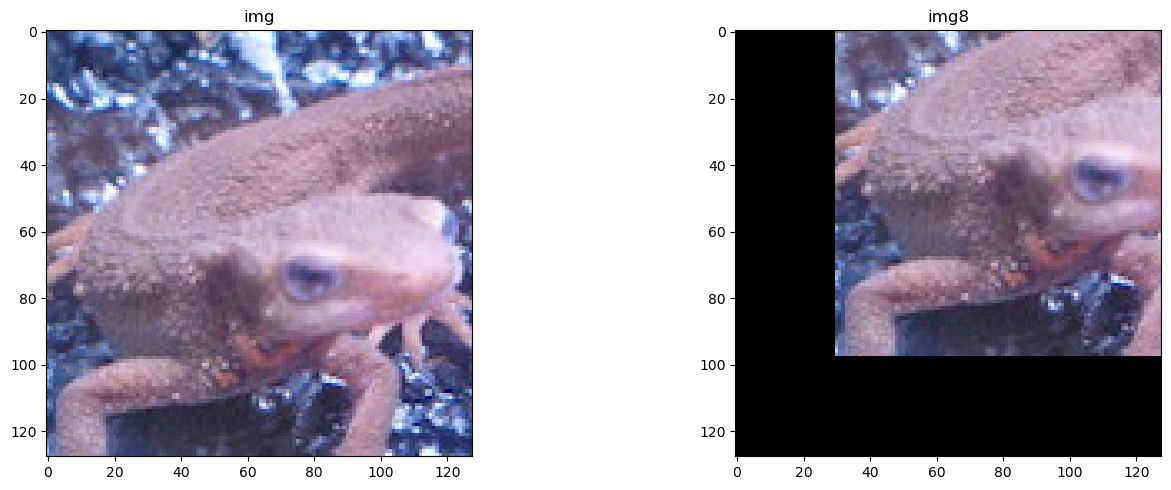

In [9]:
# 仿射变换 --- 平行移动

def transformations(img, mtrix):
    result = np.zeros_like(img)
    #将
    list = np.arange(img.shape[1]).reshape(-1,1)
    x = np.tile(list,img.shape[0])
    list = np.arange(img.shape[0])
    y = np.tile(list,img.shape[1]).reshape(-1,img.shape[0])
    
    print(result.shape)
    
    #仿射变换矩阵
    v = np.array([x.reshape(-1), y.reshape(-1), np.ones((x.size))])
    new_xy = np.dot(mtrix, v)
    new_xy = new_xy[0:2].astype(np.uint8)
    
    #将溢出部分去除
    out = (new_xy[1]<result.shape[0]) * (new_xy>=0) * (new_xy[0]<result.shape[1])
    out = np.multiply(out[0],out[1])
    for i,flag in enumerate(out):
        #只计算未溢出部分
        if flag:
            #将原来的图像赋值到新图像
            result[new_xy[1,i],new_xy[0,i]] = img[y.reshape(-1)[i],x.reshape(-1)[i]]
    return result


def transMtrix(a,b,c,d,tx,ty):
    mtrix = np.array([[a,b,tx],[c,d,ty],[0,0,1]])
    return mtrix


img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img8 = img.copy()
m = transMtrix(1, 0 , 0, 1, 30, -30)
img8 = transformations(img8, m)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('on')  # 隐藏坐标轴

axes[1].imshow(img8)
axes[1].set_title('img8')
axes[1].axis('on')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

(102, 166, 3)


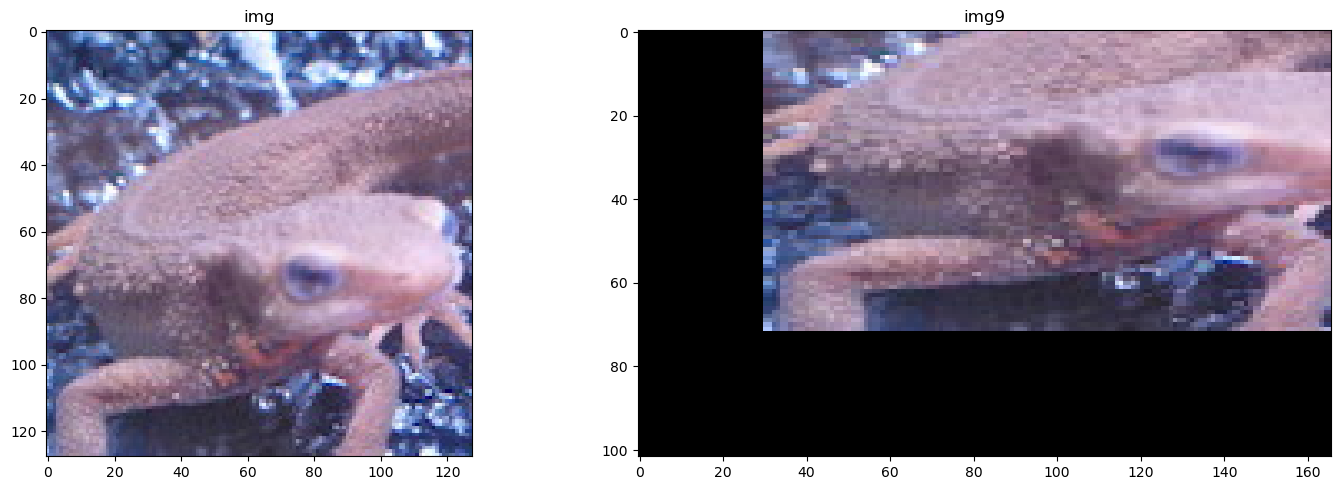

In [10]:
# 仿射变换 --- 放大缩小

def AfineTrans(img,a,b,c,d,tx,ty):
    result = np.zeros((int(img.shape[0]*d),int(img.shape[1]*a),img.shape[2]))
    #result = padding(result)

    #将新图像的横坐标和竖坐标保存到数组中
    list = np.arange(result.shape[1]).reshape(-1,1)
    new_x = np.tile(list,result.shape[0])
    list = np.arange(result.shape[0])
    new_y = np.tile(list,result.shape[1]).reshape(-1,result.shape[0])

    #逆仿射变换求出对应的点
    ad_bc = a*d-b*c
    x = (((d*new_x)-(b*new_y))/ad_bc).astype(np.uint8)
    y = (((-c*new_x)+(a*new_y))/ad_bc).astype(np.uint8)
    
    #将原坐标的点输入到新坐标中
    result[new_y,new_x] = img[y,x]
    result = result.astype(np.uint8)
    
    m = transMtrix(1,0,0,1,tx,ty)
    result = transformations(result,m)
    return result


img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img9 = img.copy()
img9 = AfineTrans(img9,1.3,0,0,0.8,30,-30)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('on')  # 隐藏坐标轴

axes[1].imshow(img9)
axes[1].set_title('img9')
axes[1].axis('on')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

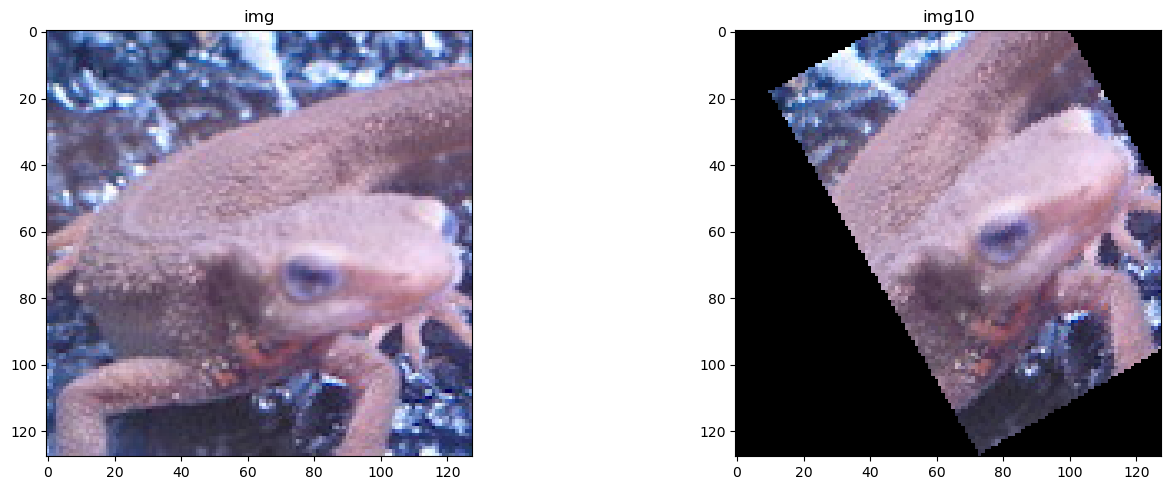

In [12]:
# 仿射变换 --- 旋转
def AfineTrans2(img,a,b,c,d,tx,ty):
    #边缘去掉方便计算
    img[0,:] = 0
    img[-1,:] = 0
    img[:,0] = 0
    img[:,-1] = 0
    
    result = np.zeros_like(img)
    #将新图像的横坐标和竖坐标保存到数组中
    list = np.arange(result.shape[0])
    new_x = np.tile(list,result.shape[1]).reshape(-1,result.shape[0])
    list = np.arange(result.shape[1]).reshape(-1,1)
    new_y = np.tile(list,result.shape[0])
    #逆仿射变换求出对应的点
    ad_bc = a*d-b*c
    x = np.round((d*new_x-b*new_y)/ad_bc).astype(np.uint8)-tx
    y = np.round((-c*new_x+a*new_y)/ad_bc).astype(np.uint8)-ty
    
    x = np.minimum(np.maximum(x, 0), img.shape[0]-1).astype(np.uint8)
    y = np.minimum(np.maximum(y, 0), img.shape[1]-1).astype(np.uint8)

    #将原坐标的点输入到新坐标中
    result[new_x,new_y] = img[x,y]
    result = result.astype(np.uint8)

    return result

img = cv2.imread("imori.jpg")
img_gamma = cv2.imread("imori_gamma.jpg")
img_dark = cv2.imread("imori_dark.jpg")
img = img[:,:,[2,1,0]]
img_gamma = img_gamma[:,:,[2,1,0]]
img_dark = img_dark[:,:,[2,1,0]]

img10 = img.copy()
cc = 30*np.pi/180
img10 = AfineTrans2(img10,np.cos(cc),-np.sin(cc),np.sin(cc),np.cos(cc),20,-40)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# 显示每个图像
axes[0].imshow(img)
axes[0].set_title('img')
axes[0].axis('on')  # 隐藏坐标轴

axes[1].imshow(img10)
axes[1].set_title('img10')
axes[1].axis('on')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()